# Importation des packages et chargement des données

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt



In [10]:

# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names


In [11]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

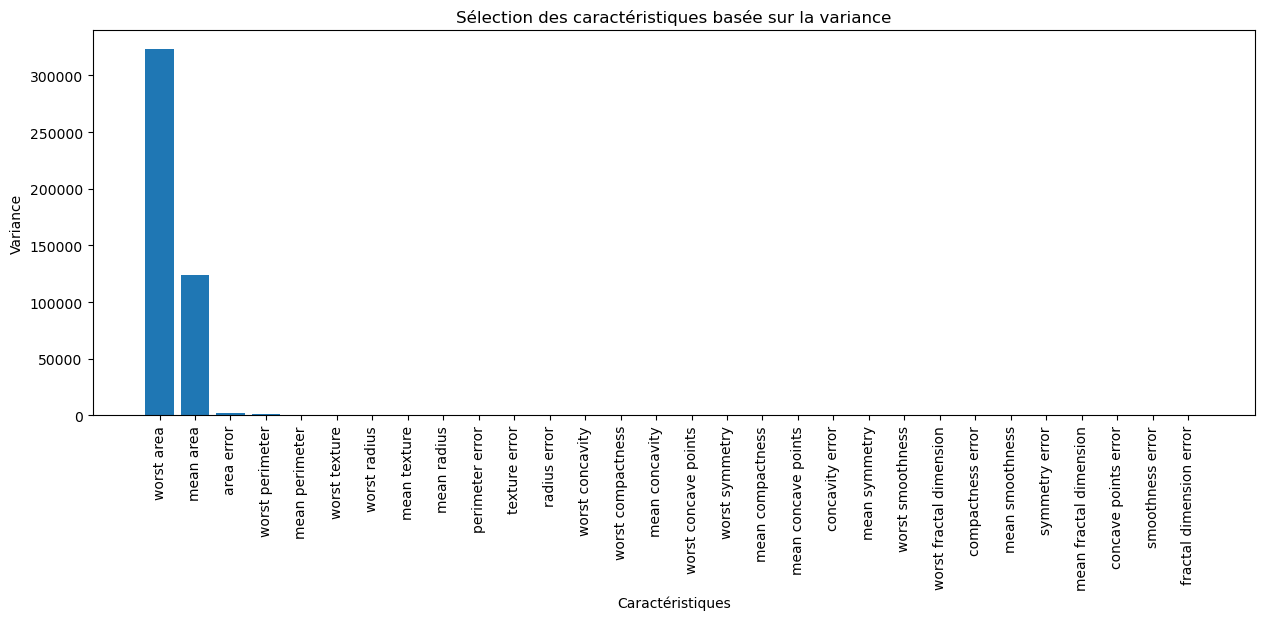

In [12]:
# Sélection des variables basée sur la variance

# Calculer la variance pour chaque caractéristique
variances = np.var(X, axis=0)
sorted_indices = np.argsort(variances)[::-1]

# Afficher la courbe des variances
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=variances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Variance')
plt.title('Sélection des caractéristiques basée sur la variance')
plt.show()


In [13]:
from sklearn.feature_selection import VarianceThreshold
# Appliquer le seuil de variance
threshold = 0.8 * (1 - 0.8)  # Exemple de seuil, à adapter selon les besoins
selector = VarianceThreshold(threshold=threshold)
X_high_variance = selector.fit_transform(X)

# Afficher les caractéristiques sélectionnées
selected_columns = columns[selector.get_support()]
print(f"Caractéristiques sélectionnées : {selected_columns}")

Caractéristiques sélectionnées : ['mean radius' 'mean texture' 'mean perimeter' 'mean area' 'texture error'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']


# Choix des variables en se basant sur l'ANOVA

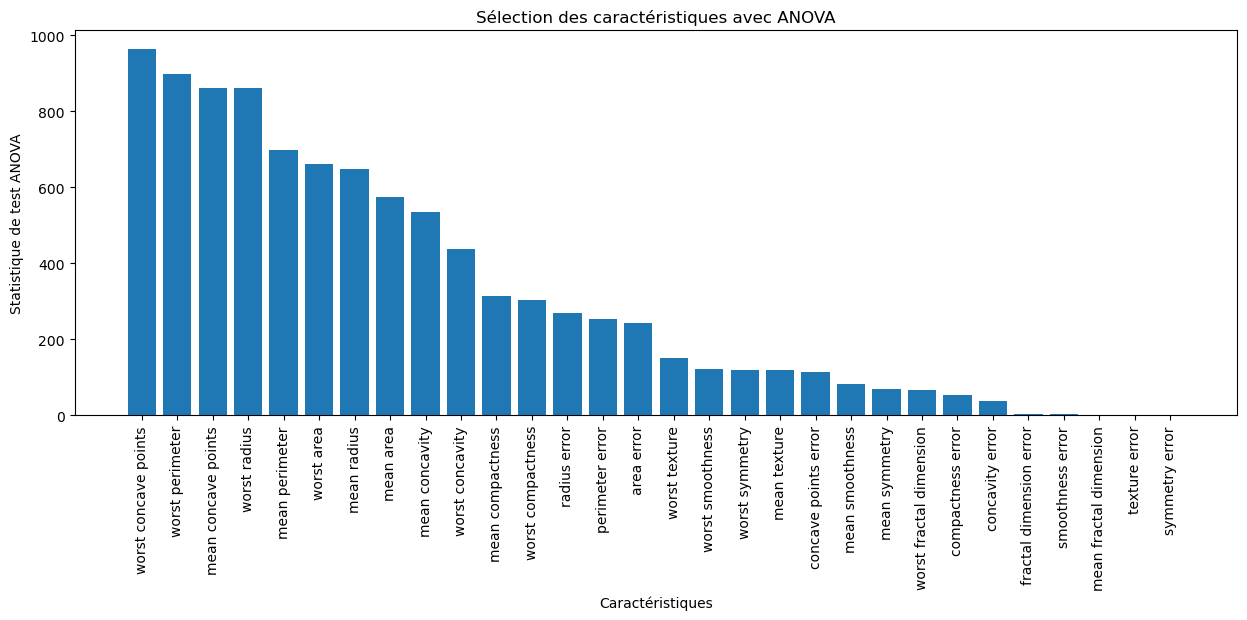

In [14]:
# Charger la base de données breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Appliquer la fonction SelectKBest avec ANOVA pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)
anova_scores = selector.scores_
sorted_indices = np.argsort(anova_scores)[::-1]

# Afficher la courbe des scores ANOVA
plt.figure(figsize=(15, 5))
plt.bar(x=data.feature_names[sorted_indices], height=anova_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test ANOVA')
plt.title('Sélection des caractéristiques avec ANOVA')
plt.show()

In [15]:

# Sélectionner les meilleures caractéristiques avec SelectKBest et ANOVA
best_features = SelectKBest(score_func=f_classif, k=10)
X_new = best_features.fit_transform(X, y)
selected_features = data.feature_names[best_features.get_support()]

print('Les meilleures caractéristiques sont :', selected_features)

Les meilleures caractéristiques sont : ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


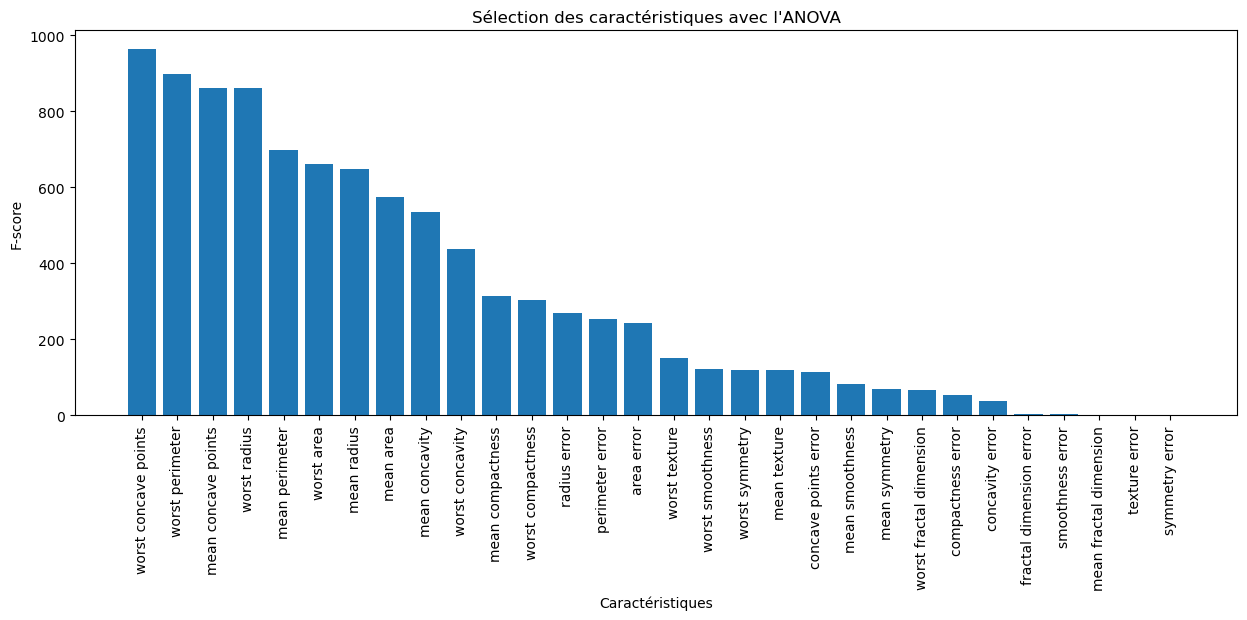

In [16]:
from scipy.stats import f_oneway,shapiro, levene
# Séparer les données en deux groupes en fonction de la variable cible
group0 = X[y == 0]
group1 = X[y == 1]

# Calculer les scores F pour chaque caractéristique avec l'ANOVA
f_scores = np.array([f_oneway(group0[:, i], group1[:, i])[0] for i in range(X.shape[1])])
sorted_indices = np.argsort(f_scores)[::-1]

# Afficher la courbe des scores F
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=f_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("F-score")
plt.title('Sélection des caractéristiques avec l\'ANOVA')
plt.show()

In [18]:

# Calculer les p-valeurs pour les tests de normalité (Shapiro-Wilk) et de Levene
normality_p_values = np.array([shapiro(X[:, i])[1] for i in range(X.shape[1])])
levene_p_values = np.array([levene(group0[:, i], group1[:, i])[1] for i in range(X.shape[1])])

# Seuil de significativité
alpha = 0.05

# Vérifier si les tests sont validés (p-valeur >= alpha)
normality_results = normality_p_values >= alpha
levene_results = levene_p_values >= alpha

# Créer un DataFrame pour présenter les résultats
results_df = pd.DataFrame({
    'Caractéristiques': columns,
    'Normalité (p-valeur)': normality_p_values,
    'Normalité (validé)': normality_results,
    'Levene (p-valeur)': levene_p_values,
    'Levene (validé)': levene_results
})

# Afficher le tableau des résultats
print(results_df)

           Caractéristiques  Normalité (p-valeur)  Normalité (validé)  \
0               mean radius          3.105940e-14               False   
1              mean texture          7.282040e-08               False   
2            mean perimeter          7.011343e-15               False   
3                 mean area          3.196541e-22               False   
4           mean smoothness          8.600337e-05               False   
5          mean compactness          3.967622e-17               False   
6            mean concavity          1.338632e-21               False   
7       mean concave points          1.404436e-19               False   
8             mean symmetry          7.881405e-09               False   
9    mean fractal dimension          1.956864e-16               False   
10             radius error          1.224594e-28               False   
11            texture error          3.560489e-19               False   
12          perimeter error          7.587803e-30  

In [19]:

# Calculer la normalité et l'égalité des variances pour chaque variable
normality_p_values = []
equality_variances_p_values = []
normality = []
equality_variances = []
alpha = 0.05

for i, column in enumerate(data.feature_names):
    w, p_w = shapiro(X[:, i])
    levene_stat, levene_p = levene(X[y == 0][:, i], X[y == 1][:, i], center='mean')
    normality_p_values.append(p_w)
    equality_variances_p_values.append(levene_p)
    normality.append(p_w > alpha)
    equality_variances.append(levene_p > alpha)

# Appliquer la fonction SelectKBest avec ANOVA pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)
anova_scores = selector.scores_
sorted_indices = np.argsort(anova_scores)[::-1]

# Afficher les résultats sous forme de tableau
table = pd.DataFrame({'Caractéristique': data.feature_names[sorted_indices],
                      'Score ANOVA': anova_scores[sorted_indices],
                      'Normalité (p-valeur)': np.array(normality_p_values)[sorted_indices],
                      'Normalité': np.array(normality)[sorted_indices],
                      'Égalité des variances (p-valeur)': np.array(equality_variances_p_values)[sorted_indices],
                      'Égalité des variances': np.array(equality_variances)[sorted_indices]})
print(table)

            Caractéristique  Score ANOVA  Normalité (p-valeur)  Normalité  \
0      worst concave points   964.385393          1.985605e-10      False   
1           worst perimeter   897.944219          1.373360e-17      False   
2       mean concave points   861.676020          1.404436e-19      False   
3              worst radius   860.781707          1.704276e-17      False   
4            mean perimeter   697.235272          7.011343e-15      False   
5                worst area   661.600206          5.595546e-25      False   
6               mean radius   646.981021          3.105940e-14      False   
7                 mean area   573.060747          3.196541e-22      False   
8            mean concavity   533.793126          1.338632e-21      False   
9           worst concavity   436.691939          4.542876e-17      False   
10         mean compactness   313.233079          3.967622e-17      False   
11        worst compactness   304.341063          1.247566e-19      False   

# Sélection des variables en se basant sur le test de kruskall wallis

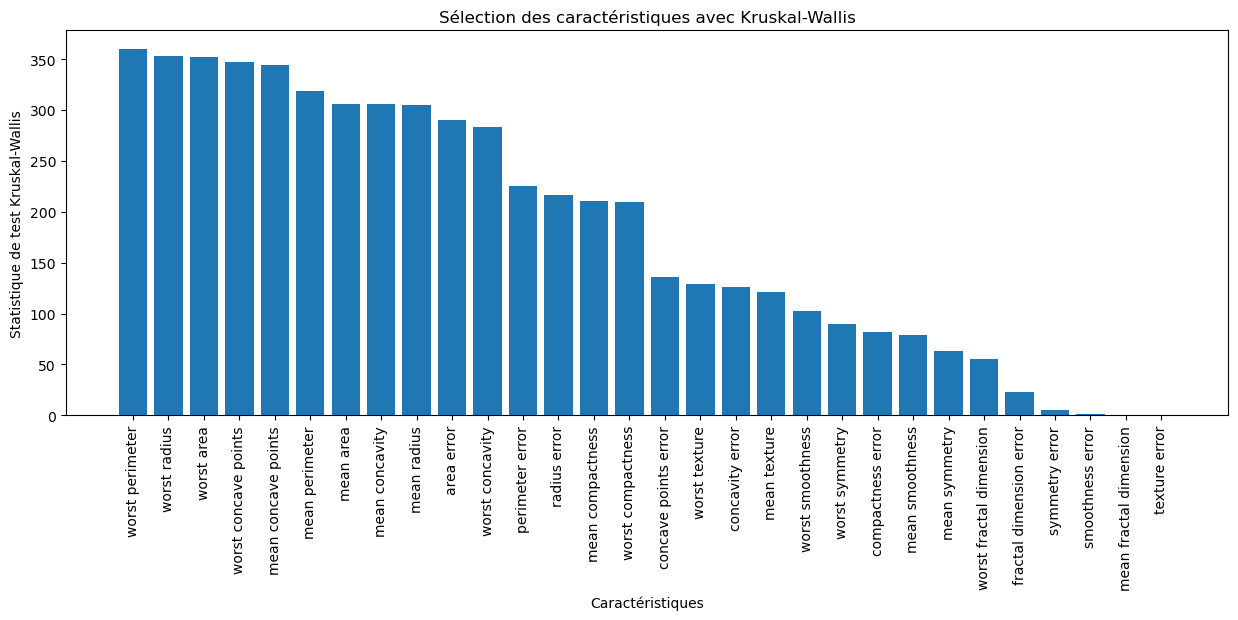

In [23]:
from scipy.stats import kruskal
# Séparer les données en deux groupes en fonction de la variable cible
group0 = X[y == 0]
group1 = X[y == 1]

# Appliquer la fonction SelectKBest avec Kruskal-Wallis pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=lambda X, y: np.array([kruskal(group0[:, i], group1[:, i]).statistic for i in range(X.shape[1])]), k='all')
X_new = selector.fit_transform(X, y)
kruskal_scores = selector.scores_
sorted_indices = np.argsort(kruskal_scores)[::-1]

# Afficher la courbe des scores Kruskal-Wallis
plt.figure(figsize=(15, 5))
plt.bar(x=data.feature_names[sorted_indices], height=kruskal_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test Kruskal-Wallis')
plt.title('Sélection des caractéristiques avec Kruskal-Wallis')
plt.show()

In [24]:
# Sélectionner les meilleures caractéristiques avec SelectKBest et Kruskal-Wallis
best_features = SelectKBest(score_func=lambda X, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, X), k=10)
X_new = best_features.fit_transform(X, y)
selected_features = data.feature_names[best_features.get_support()]

print('Les meilleures caractéristiques sont :', selected_features)

Les meilleures caractéristiques sont : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']


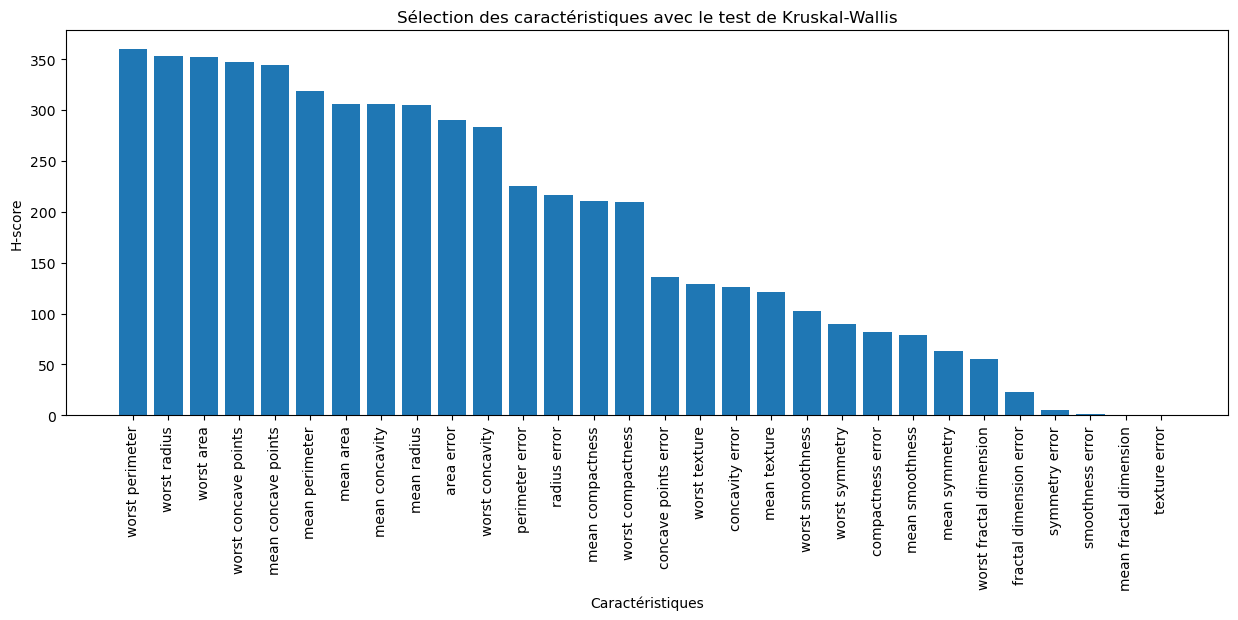

In [21]:
from scipy.stats import kruskal
# Séparer les données en deux groupes en fonction de la variable cible
group0 = X[y == 0]
group1 = X[y == 1]

# Calculer les scores H pour chaque caractéristique avec le test de Kruskal-Wallis
h_scores = np.array([kruskal(group0[:, i], group1[:, i])[0] for i in range(X.shape[1])])
sorted_indices = np.argsort(h_scores)[::-1]

# Afficher la courbe des scores H
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=h_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("H-score")
plt.title('Sélection des caractéristiques avec le test de Kruskal-Wallis')
plt.show()

In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = data.data, data.target
columns = data.feature_names

# Sélectionner les meilleures caractéristiques avec SelectKBest et Kruskal-Wallis
best_features = SelectKBest(score_func=lambda X, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, X), k=10)
X_new = best_features.fit_transform(X, y)
selected_features = columns[best_features.get_support()]

# Diviser le jeu de données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

# Entraîner une régression logistique sur les caractéristiques sélectionnées
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print('Précision : {:.2f}'.format(accuracy))

Précision : 0.94


/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Sélection des variables en se basant sur le khi deux

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
# Charger les données
data = load_breast_cancer(as_frame=True).frame

# Discrétiser les variables numériques
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
num_cols = data.select_dtypes(include='number').columns
data[num_cols] = discretizer.fit_transform(data[num_cols])

# Transformer les colonnes en caractères
data[num_cols] = data[num_cols].astype(str)


/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 30 are removed. Consider decreasing the number of bins.
  warnings.warn(


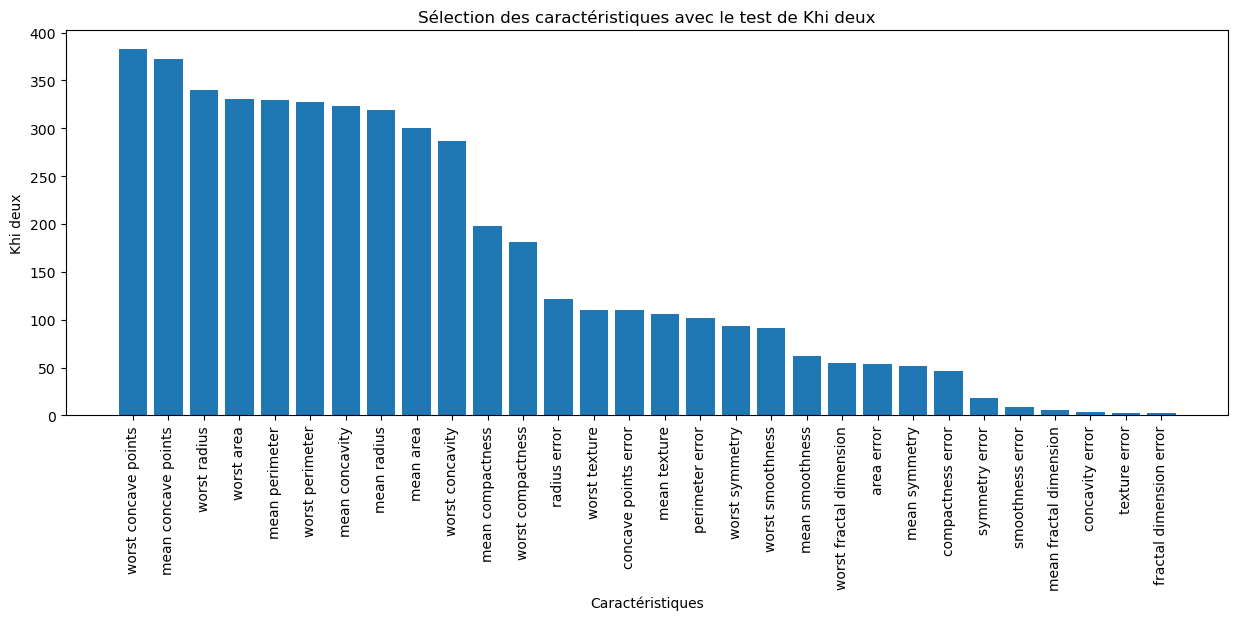

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency
# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Calculer les scores de Khi deux pour chaque caractéristique
chi2_scores = np.array([chi2_contingency(pd.crosstab(X_discrete[:, i], y))[0] for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(chi2_scores)[::-1]

# Afficher la courbe des scores de Khi deux
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=chi2_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("Khi deux")
plt.title('Sélection des caractéristiques avec le test de Khi deux')
plt.show()






# Sélection basée sur le Cramer

In [17]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



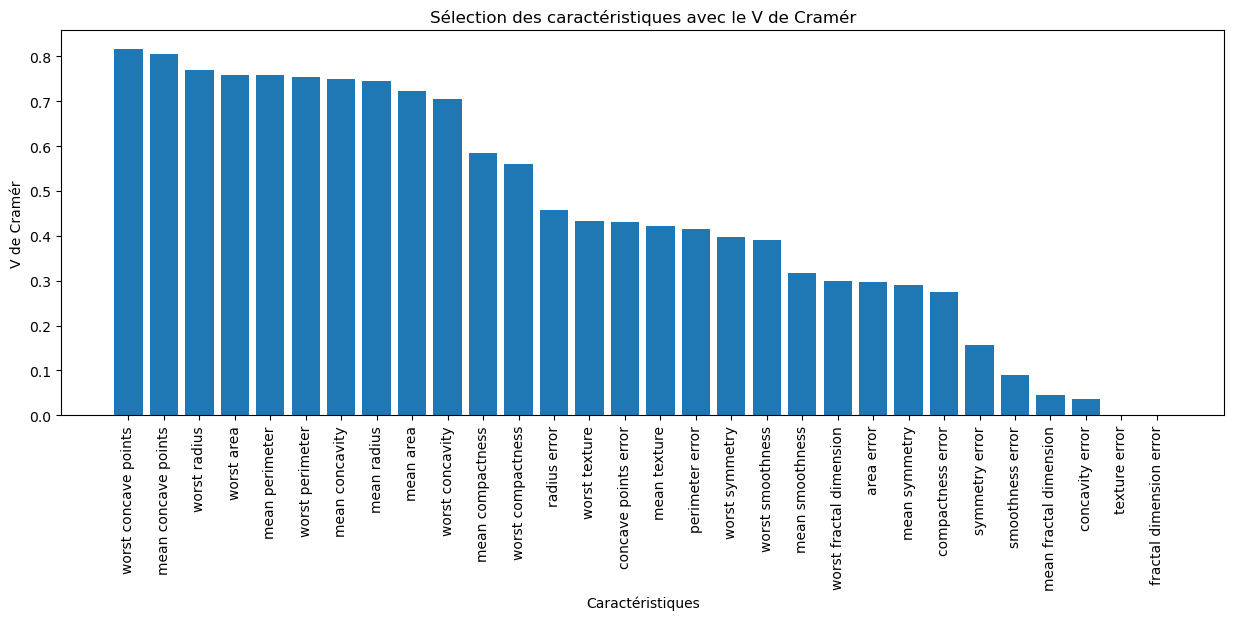

In [18]:
# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Calculer les scores de V de Cramér pour chaque caractéristique
cramers_v_scores = np.array([cramers_v(X_discrete[:, i], y) for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(cramers_v_scores)[::-1]

# Afficher la courbe des scores V de Cramér
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=cramers_v_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("V de Cramér")
plt.title('Sélection des caractéristiques avec le V de Cramér')
plt.show()

# Sélection basée sur le T de Tschuprow

In [19]:
def tchuprow_t(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / (np.sqrt((k - 1) * (r - 1))))


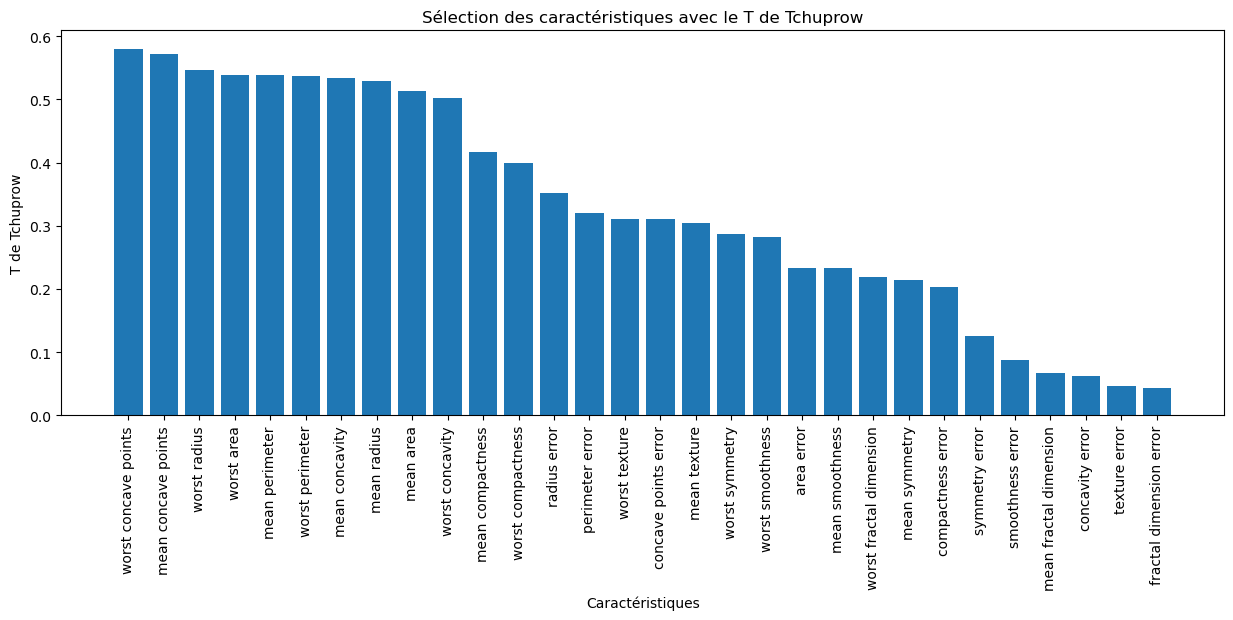

In [20]:

# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Calculer les scores de T de Tchuprow pour chaque caractéristique
tchuprow_t_scores = np.array([tchuprow_t(X_discrete[:, i], y) for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(tchuprow_t_scores)[::-1]

# Afficher la courbe des scores T de Tchuprow
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=tchuprow_t_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("T de Tchuprow")
plt.title('Sélection des caractéristiques avec le T de Tchuprow')
plt.show()

# Sélection basée sur l'information value

L'Information Value (IV) est une mesure utilisée pour évaluer la puissance prédictive d'une variable catégorielle dans un modèle de régression binaire. L'IV est basé sur le concept de Weight of Evidence (WOE), qui est une mesure logarithmique des proportions d'événements et de non-événements pour chaque catégorie d'une variable.

### Calcul de l'Information Value

L'Information Value pour une variable est calculée en utilisant la formule suivante :

$$IV = \sum_{i=1}^n (EventDist_i - NonEventDist_i) * WOE_i$$

où $n$ est le nombre de catégories pour la variable, $EventDist_i$ est la proportion d'événements pour la catégorie $i$, $NonEventDist_i$ est la proportion de non-événements pour la catégorie $i$, et $WOE_i$ est le Weight of Evidence pour la catégorie $i$.

Le Weight of Evidence pour une catégorie est calculé en utilisant la formule suivante :

$$WOE_i = \ln \frac{EventDist_i}{NonEventDist_i}$$

### Interprétation de l'Information Value

L'Information Value peut être interprété comme suit :

- IV < 0.02 : La variable a très peu de pouvoir prédictif.
- 0.02 <= IV < 0.1 : La variable a un faible pouvoir prédictif.
- 0.1 <= IV < 0.3 : La variable a un pouvoir prédictif moyen.
- 0.3 <= IV < 0.5 : La variable a un pouvoir prédictif fort.
- IV >= 0.5 : La variable a un pouvoir prédictif très fort, mais cela peut indiquer une fuite d'informations (data leakage) ou un problème avec les données.


In [21]:
def information_value(x, y, epsilon=1e-6):
    df = pd.DataFrame({'feature': x, 'target': y})
    df['bins'] = pd.cut(df['feature'], bins=pd.Series(np.unique(x)).nunique())
    grouped = df.groupby('bins')['target'].agg(['count', 'sum'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['event_dist'] = (grouped['sum'] + epsilon) / (grouped['sum'].sum() + epsilon)
    grouped['non_event_dist'] = (grouped['non_event'] + epsilon) / (grouped['non_event'].sum() + epsilon)
    grouped['woe'] = np.log(grouped['event_dist'] / grouped['non_event_dist'])
    grouped['iv'] = (grouped['event_dist'] - grouped['non_event_dist']) * grouped['woe']
    return grouped['iv'].sum()


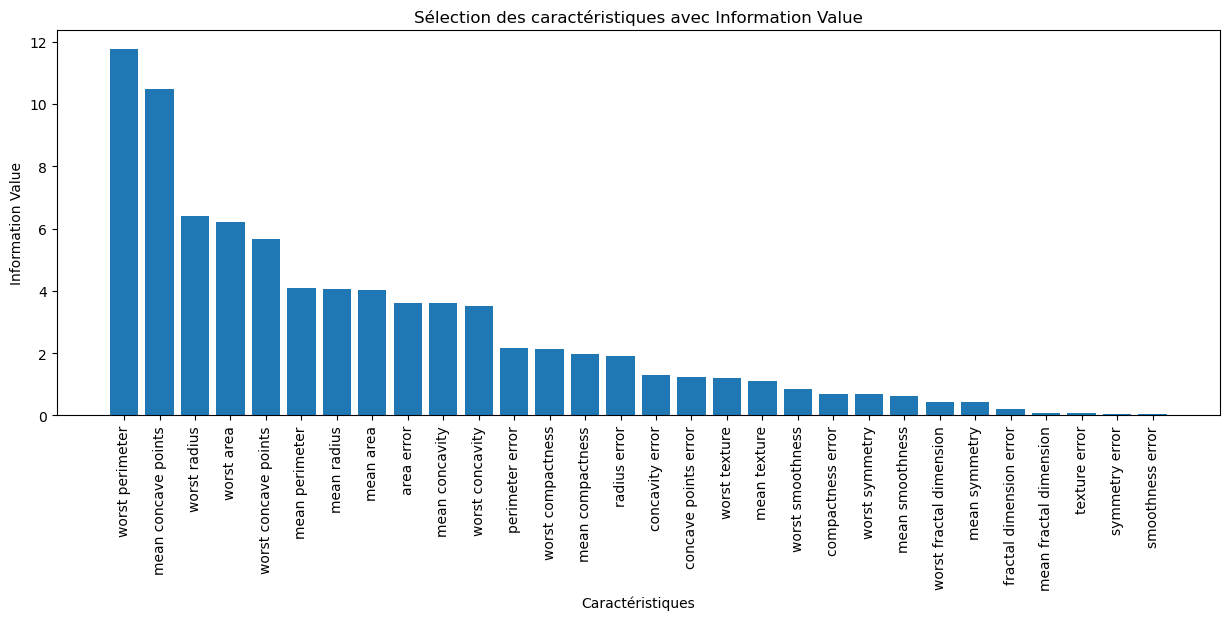

In [22]:
# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_discrete = discretizer.fit_transform(X)

# Calculer l'Information Value pour chaque caractéristique
iv_scores = np.array([information_value(X_discrete[:, i], y) for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(iv_scores)[::-1]

# Afficher la courbe des scores d'Information Value
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=iv_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("Information Value")
plt.title('Sélection des caractéristiques avec Information Value')
plt.show()

In [ ]:
iv_scores

# Liste des méthodes de filtrage

Les méthodes de sélection de variables par filtrage (filter methods) évaluent la pertinence des variables en fonction de leurs propriétés statistiques, sans tenir compte du modèle de machine learning spécifique. Voici quelques méthodes de filtrage couramment utilisées pour la sélection des variables :

**Corrélation de Pearson** : Cette méthode mesure la corrélation linéaire entre chaque variable et la variable cible. Les variables ayant une corrélation élevée (positive ou négative) sont considérées comme pertinentes.


**Chi-carré (Chi-squared)** : Le test du chi-carré est utilisé pour déterminer si une relation significative existe entre deux variables catégorielles. Il est couramment utilisé pour la sélection de caractéristiques lorsque les variables d'entrée et la variable cible sont toutes deux catégorielles.

**Coefficient de corrélation de Cramer** : Le coefficient de corrélation de Cramer est une mesure de la force de l'association entre deux variables catégorielles. Il peut être utilisé pour mesurer la relation entre deux variables catégorielles, comme la taille et la couleur, ou la marque et la couleur d'un produit. Le coefficient de corrélation de Cramer varie de 0 à 1, où 0 indique une absence d'association et 1 indique une association parfaite.

**ANOVA (Analyse de la variance)** : L'ANOVA est utilisée pour déterminer si les moyennes de plusieurs groupes sont égales. Dans la sélection de caractéristiques, l'ANOVA est souvent utilisée pour comparer les moyennes des groupes formés en fonction de la variable cible pour chaque variable d'entrée.

**Test de Kruskal-Wallis** : Le test de Kruskal-Wallis est une alternative non paramétrique à l'ANOVA qui teste si plusieurs groupes ont la même distribution. Il est utile pour la sélection de caractéristiques lorsque les données ne satisfont pas aux hypothèses de l'ANOVA (par exemple, lorsque les données ne sont pas normalement distribuées).

**Variance**: La sélection de variables basée sur la variance consiste à choisir les variables dont la variance est supérieure à un certain seuil. Les variables ayant une faible variance sont considérées comme moins informatives car elles ne varient pas beaucoup entre les observations.

**Corrélation de Pearson** : Cette méthode mesure la corrélation linéaire entre deux variables continues. Elle peut être utilisée pour déterminer si deux variables sont liées et dans quelle mesure elles varient ensemble. La corrélation de Pearson peut être utilisée pour évaluer la relation entre une variable indépendante et une variable dépendante.

**Test de Wilcoxon** : Le test de Wilcoxon est une méthode non paramétrique utilisée pour tester si deux échantillons indépendants ont la même distribution. Il peut être utilisé pour comparer les différences entre les variables continues de deux groupes. Le test de Wilcoxon est souvent utilisé dans les études cliniques pour évaluer les effets de traitements ou de thérapies sur une variable mesurée chez des patients.

**Information Value (IV)** : L'Information Value est une mesure utilisée pour évaluer la capacité d'une variable à prédire la variable cible dans le contexte des modèles de régression logistique. Elle est basée sur les rapports de cotes (Odds Ratios) et le concept de Weight of Evidence (WOE).